# Aprendizagem baseada em instâncias: KNN
O algoritmo k-viznhos mais próximos é um dos métodos de aprendizagem de máquina supervisionada mais simples, porém incrivelmente eficaz em certas tarefas.

KNN é um algoritmo usado tanto em tarefas de classificação quanto de regressão. Utiliza o valor *k* e uma medida de distância (ex. distância Euclidiana) para identificar vizinhos mais próximos de um dado exemplo. Algumas vantagens do algoritmo KNN incluem:
- simples de implementar
- o treinamento é fácil (basicamente carregar os exemplos de treinamento na memória)
- em geral, possui poucos parâmetros

Os contras incluem:
- alto custo de predição
- alto custo de memória para grandes bases de dados
- requer adaptações para atributos categóricos

A figura abaixo mostra um novo ponto - identificado pela estrela - que queremos classificar. Se usarmos um valor k de 3, classificaríamos o novo ponto com os elementos cinza. No entanto, se usarmos um valor k de 10, classificaríamos o novo ponto com os elementos laranja. Quanto menor o valor de k, maior o ruído com os dados; no entanto, podemos suavizar isso aumentando o valor de k.

![Fonte:https://medium.com/@kbrook10/day-11-machine-learning-using-knn-k-nearest-neighbors-with-scikit-learn-350c3a1402e6](https://github.com/ufrpe-bcc-ia/material-aulas/blob/master/imagens/img_knn_01.png?raw=true)

Fonte: [Medium](https://medium.com/@kbrook10/day-11-machine-learning-using-knn-k-nearest-neighbors-with-scikit-learn-350c3a1402e6)

# Exemplo

## Carregar dataset

In [1]:
from sklearn import datasets
iris = datasets.load_iris()

## Descrição

In [2]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
print(iris.feature_names)
print(iris.data[0:3])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]


## Separar conjuntos de treino e teste


In [4]:
import numpy as np

print('dataset size:', len(iris.data))

indices = np.random.permutation(len(iris.data))
indices_train = indices[:-50]
indices_test  = indices[-50:]
print('train:', len(indices_train))
print('test:', len(indices_test))

data_train = iris.data[indices_train]
data_test  = iris.data[indices_test]

label_train = iris.target[indices_train]
label_test = iris.target[indices_test]

print(data_train[0:3])
print(label_train[0:3])

dataset size: 150
train: 100
test: 50
[[7.2 3.  5.8 1.6]
 [5.4 3.4 1.7 0.2]
 [5.  3.2 1.2 0.2]]
[2 0 0]


## Algoritmo

### Medida de distância (Euclidiana)

>$d(\mathbb{x},\mathbb{y})=\sqrt{\sum_{i=1}^d (x_i - y_i)^2}$

onde $\mathbb{x},\mathbb{y} \in \mathbb{R}^d$


In [5]:
import math

# Euclidean Distance
def distance(x, y):
    distance = 0
    for i in range(0,len(x)):
        distance += pow((x[i] - y[i]), 2)
    return math.sqrt(distance)

In [6]:
# teste
distance(data_train[0],data_train[3])

2.229349680960795

### Implementação do algoritmo KNN

In [68]:
from collections import Counter

class KNNModel():

  def __init__(self, k=3):
    self.k = k

  def train(self, train_x, train_y):
    self.train_X = train_x
    self.train_Y = train_y

  def predict(self, test_x):
    pred = []

    for i, p_test in enumerate(test_x):
      p_distances = []

      for j, (X, Y) in enumerate(zip(self.train_X, self.train_Y)):
        p_distances.append((distance(X, p_test), Y))

      p_distances = sorted(p_distances, key = lambda x: x[0])
      p_distances = p_distances[:self.k]

      p_labels = [x[1] for x in p_distances]
      p_labels_counter = Counter(p_labels)

      pred.append(p_labels_counter.most_common(1)[0][0])

    return pred


## Avaliação

In [74]:
# Taxa de acerto
def accuracy(y_true, y_pred):
  tp_tn = 0
  for label, pred in zip(y_true, y_pred):
    if label == pred:
      tp_tn += 1

  return tp_tn / len(y_true)


model = KNNModel(k=1)
model.train(data_train, label_train)

y_pred = model.predict(data_test)
print(accuracy(label_test, y_pred))

0.98


## Variando $k$

In [70]:
k_vals = [1,3,5,15, 25, 30]
acc_vals = []
for val in k_vals:
  knn = KNNModel(k=val)
  knn.train(data_train, label_train)
  pred = knn.predict(data_test)
  acc_vals.append(accuracy(label_test, pred))

acc_vals

[0.98, 0.98, 1.0, 1.0, 1.0, 0.98]

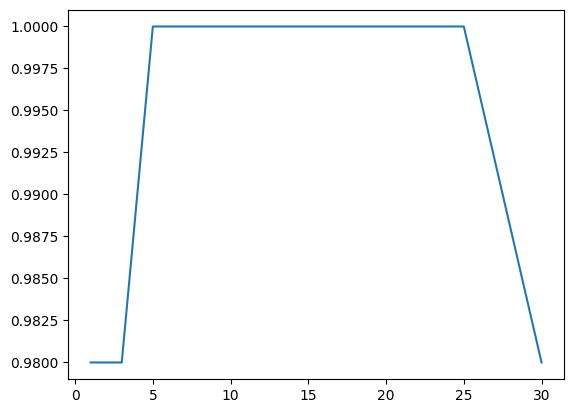

In [71]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.plot(k_vals, acc_vals)